In [89]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from fredapi import Fred
import matplotlib.pyplot as plt

In [90]:
fred = Fred(api_key='6cc00d6dd7a79e8de471491dc74cc1fe')

<Axes: >

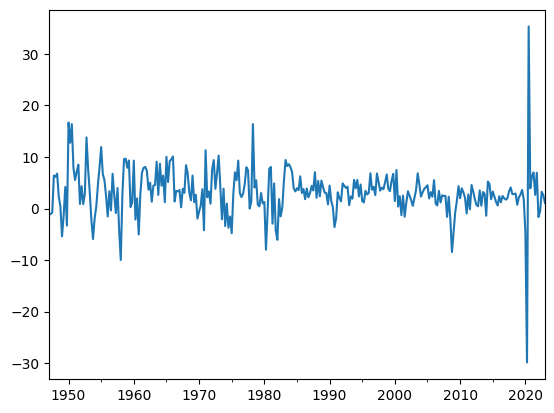

In [91]:
real_gdp = fred.get_series('GDPC1',units="pca")
real_gdp.name = 'real gdp'
real_gdp.plot()

In [92]:
real_gdp=pd.DataFrame(real_gdp)
real_gdp

,real gdp
1947-01-01,NaN
1947-04-01,-1.06256
1947-07-01,-0.82346
1947-10-01,6.40546
1948-01-01,6.15392
...,...
2022-01-01,-1.63128
2022-04-01,-0.57728
2022-07-01,3.24334
2022-10-01,2.57407


In [93]:
def identify_cycle_phase(x):
    if x > 0:
        return 0
    else :
        return 1
    

In [94]:
real_gdp['cycle_phase'] = real_gdp['real gdp'].apply(identify_cycle_phase)
real_gdp['real gdp'].fillna(method='ffill',inplace=True)
real_gdp=real_gdp.fillna(0)
real_gdp

,real gdp,cycle_phase
1947-01-01,0.00000,1
1947-04-01,-1.06256,1
1947-07-01,-0.82346,1
1947-10-01,6.40546,0
1948-01-01,6.15392,0
...,...,...
2022-01-01,-1.63128,1
2022-04-01,-0.57728,1
2022-07-01,3.24334,0
2022-10-01,2.57407,0


In [95]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [96]:
data_tr=real_gdp[:100]
data_test=real_gdp[100:]

In [97]:
x=data_tr['real gdp'].values.reshape(-1,1)
y = data_tr['cycle_phase'].values.reshape(-1,1)

In [98]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [99]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in lr_list:
    model_gbm = GradientBoostingClassifier(n_estimators=5000,
                                        learning_rate=learning_rate,
                                        max_depth=3,
                                        subsample=0.5,
                                        validation_fraction=0.1,
                                        n_iter_no_change=20,
                                        max_features='log2',
                                        verbose=0)
    model_gbm.fit(X_train, Y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(model_gbm.score(X_train, Y_train)))
    print("Accuracy score (testing): {0:.3f}".format(model_gbm.score(X_test, Y_test)))

c:\Users\admin\Documents\GitHub\projet-de-fin-d-annee\.venv\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate:  0.05
Accuracy score (training): 1.000
Accuracy score (testing): 0.950


c:\Users\admin\Documents\GitHub\projet-de-fin-d-annee\.venv\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate:  0.075
Accuracy score (training): 1.000
Accuracy score (testing): 0.950


c:\Users\admin\Documents\GitHub\projet-de-fin-d-annee\.venv\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate:  0.1
Accuracy score (training): 1.000
Accuracy score (testing): 0.950
Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (testing): 0.950
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (testing): 0.950


c:\Users\admin\Documents\GitHub\projet-de-fin-d-annee\.venv\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\admin\Documents\GitHub\projet-de-fin-d-annee\.venv\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\admin\Documents\GitHub\projet-de-fin-d-annee\.venv\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (testing): 0.950
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (testing): 0.950


c:\Users\admin\Documents\GitHub\projet-de-fin-d-annee\.venv\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [100]:
from sklearn.metrics import classification_report, confusion_matrix

In [101]:
model_gbm2 = GradientBoostingClassifier(n_estimators=5000,
                                        learning_rate=0.075,
                                        max_depth=3,
                                        subsample=0.5,
                                        validation_fraction=0.1,
                                        n_iter_no_change=20,
                                        max_features='log2',
                                        verbose=0)
model_gbm2.fit(X_train, Y_train)
prediction=model_gbm2.predict(real_gdp[real_gdp.columns[:-1]])

c:\Users\admin\Documents\GitHub\projet-de-fin-d-annee\.venv\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\admin\Documents\GitHub\projet-de-fin-d-annee\.venv\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [102]:
print("Classification Report")
print(classification_report(real_gdp[real_gdp.columns[-1]], prediction))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       259
           1       1.00      0.98      0.99        46

    accuracy                           1.00       305
   macro avg       1.00      0.99      0.99       305
weighted avg       1.00      1.00      1.00       305



c:\Users\admin\Documents\GitHub\projet-de-fin-d-annee\.venv\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


<Axes: >

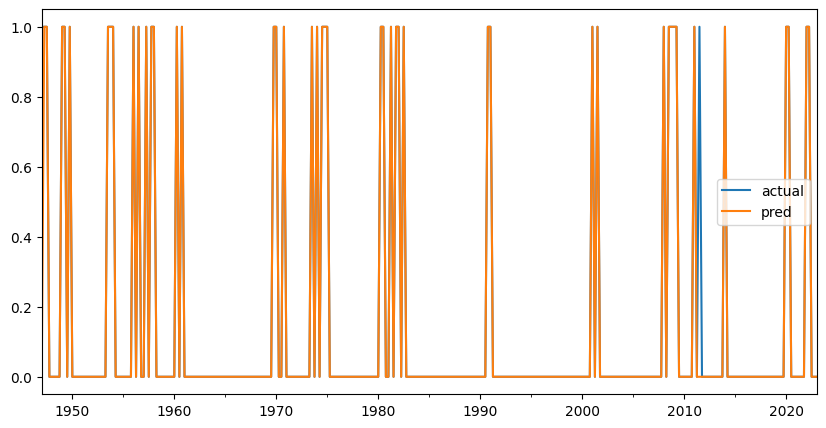

In [103]:
results=pd.DataFrame()
results['actual']=real_gdp[real_gdp.columns[-1]]
results['pred']=model_gbm.predict(real_gdp[real_gdp.columns[:-1]])
results.plot(figsize=(10,5))

In [104]:
from pandas_datareader.data import DataReader


In [105]:
def plot(df,start=None):
    if start is None:
        start=df.index.min()
    recessions=DataReader('USREC', 'fred', start=start)['USREC']
    fig, ax = plt.subplots(figsize=(13, 9), dpi=300)
    
    if isinstance(df,pd.DataFrame):
        ylim = (df.min().min(),df.max().max())
    else:
        ylim = (df.min(),df.max())
    df.plot(ax=ax)
    ax.fill_between(recessions.index, ylim[0]-1e-2, ylim[1]+1e-2, recessions,facecolor='k', alpha=0.1)
    return fig,ax

(<Figure size 3900x2700 with 1 Axes>, <Axes: >)

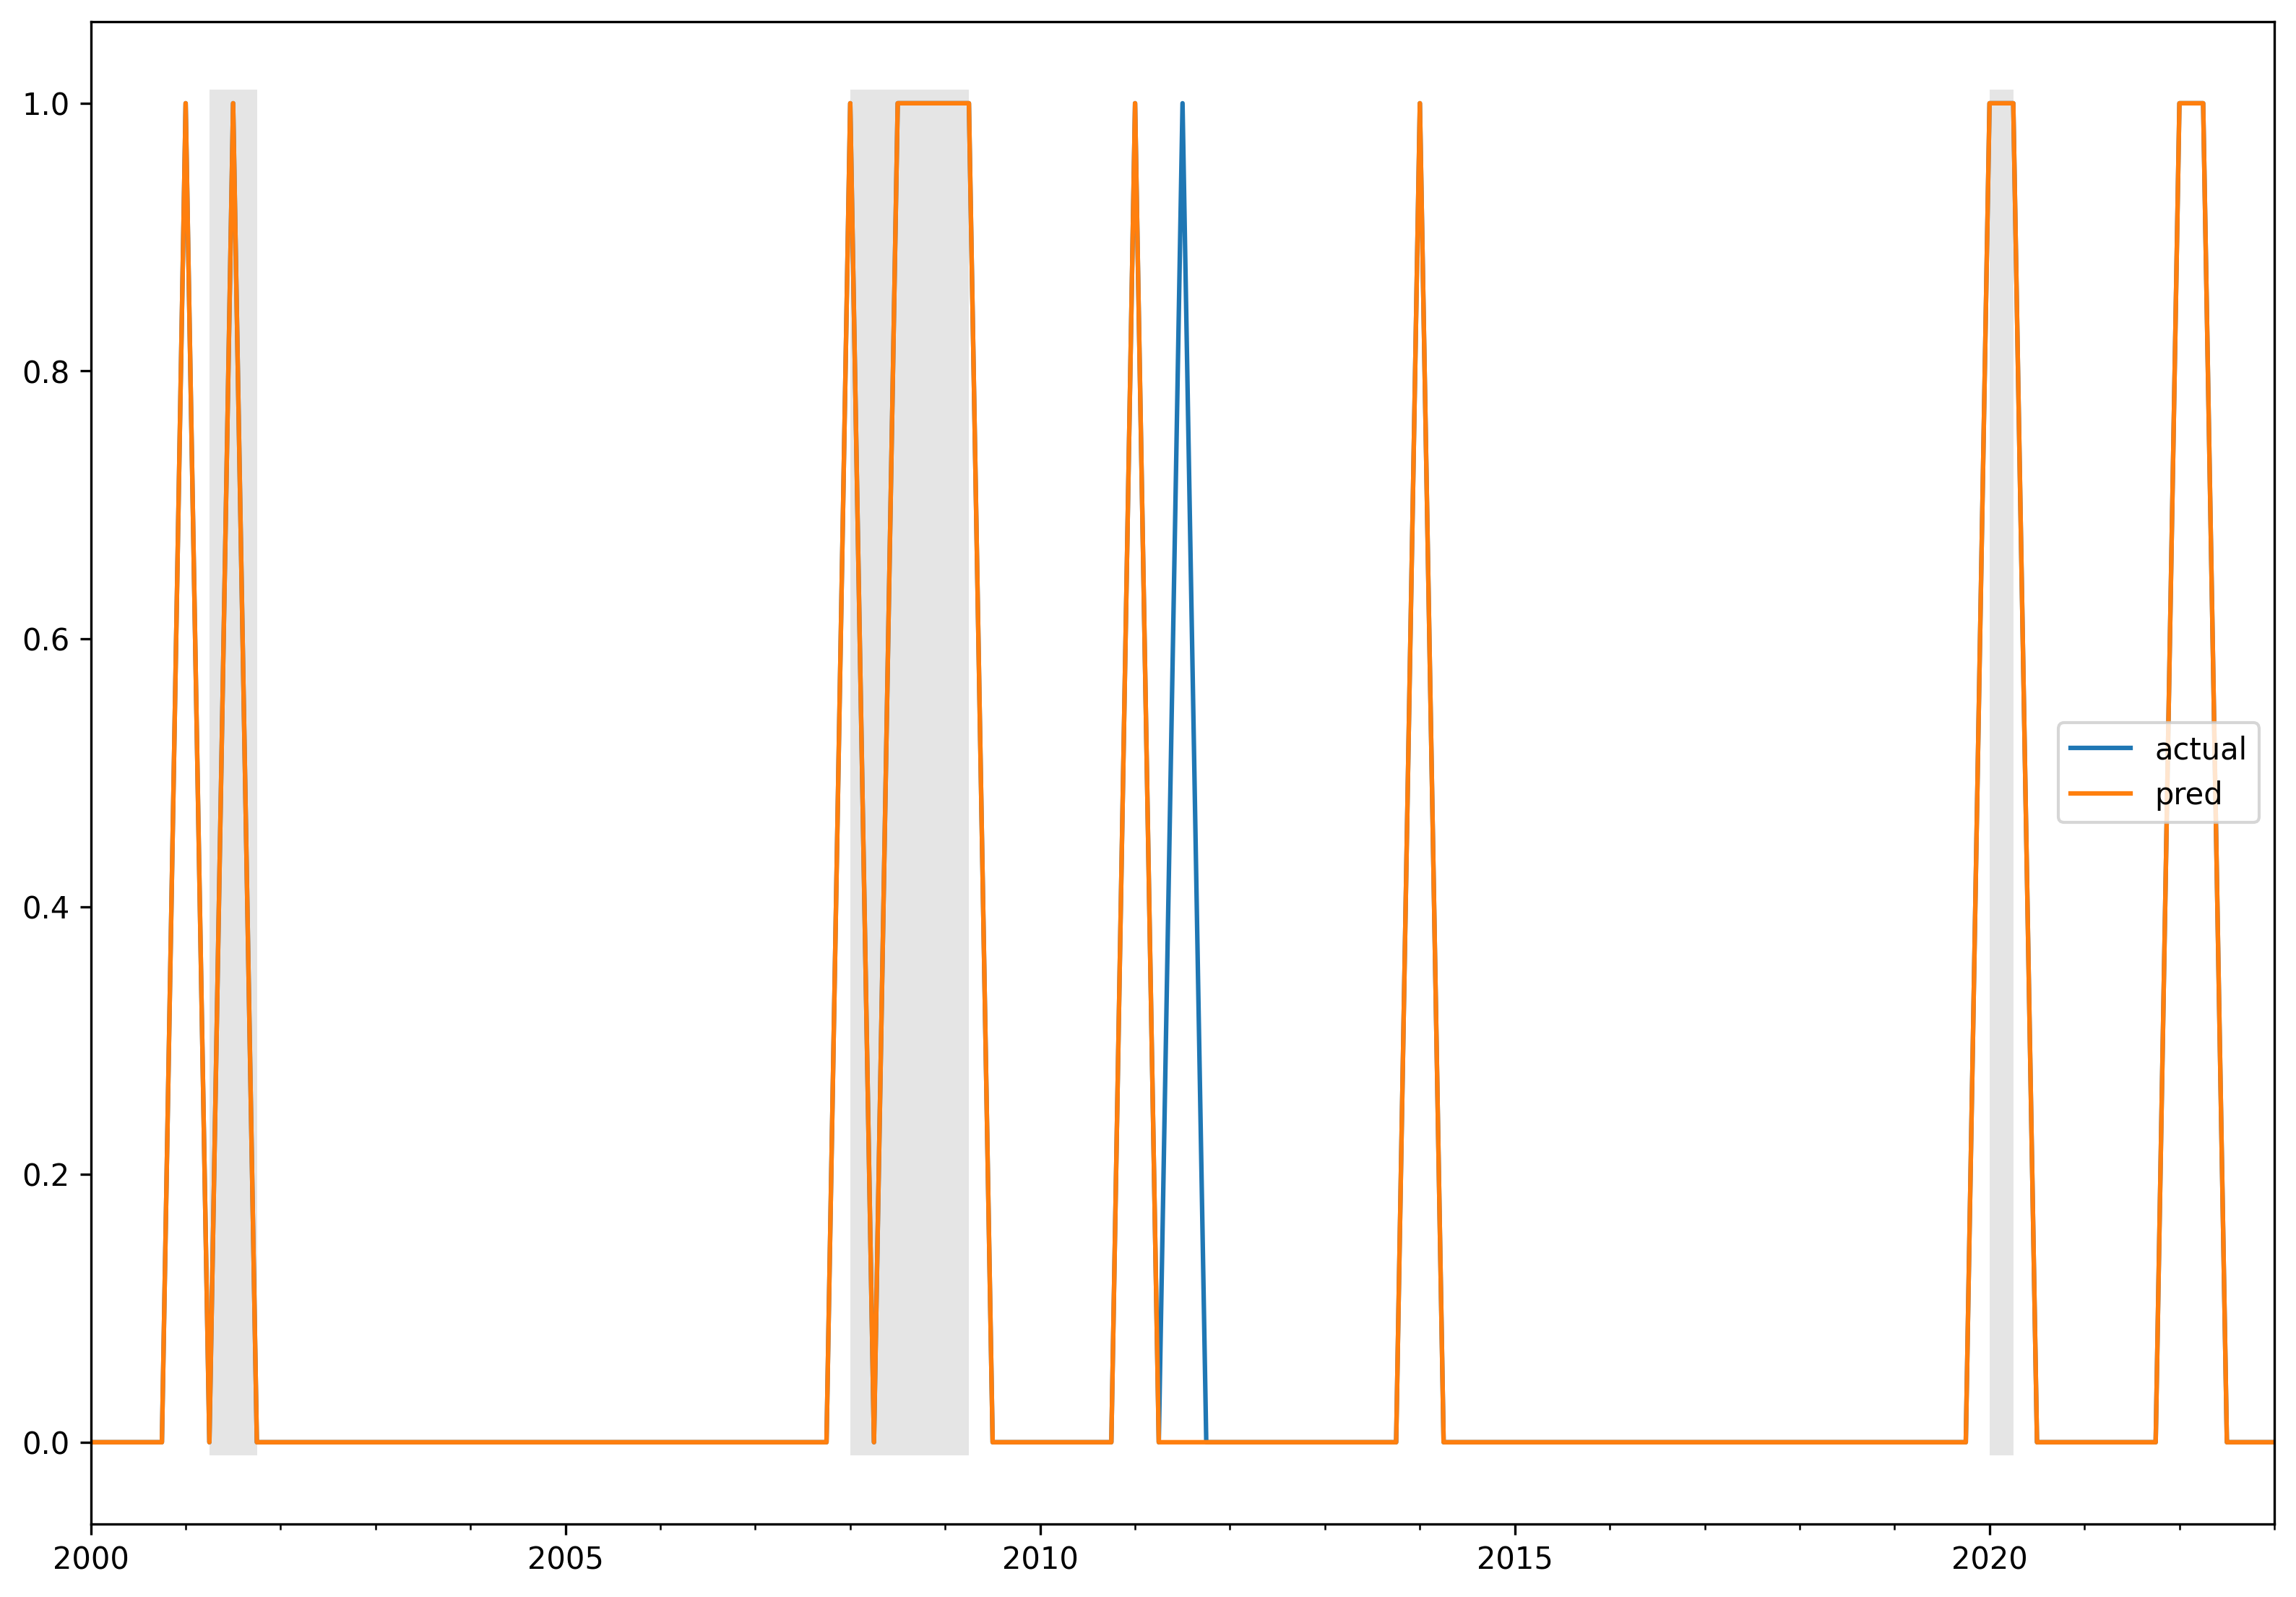

In [108]:
plot(results.loc['2000':])
